In [1]:
# Importing the required libraries
import nfl_data_py as nfl
import pandas as pd

# Pulling data (for example, play-by-play data for 2023)
years = [2023]
pbp_data = nfl.import_pbp_data(years)

# Show the first few rows of the data
pbp_data.head()

2023 done.
Downcasting floats.


,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,NaN,None,None,None
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11.0,11.0,NaN,NaN,NaN,None,None,None
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11.0,11.0,NaN,NaN,NaN,None,None,None
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,4.53,2.169,0.0,HITCH,ZONE_COVERAGE,COVER_3
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,NaN,NaN,NaN,None,None,None


In [2]:
# Checking for missing values
missing_values = pbp_data.isnull().sum()

# Checking the data types
data_types = pbp_data.dtypes

# Display results
print("Missing values in the dataset:")
print(missing_values)

print("\nData types of the columns:")
print(data_types)

Missing values in the dataset:
play_id                      0
game_id                      0
old_game_id_x                0
home_team                    0
away_team                    0
                         ...  
time_to_throw            32905
was_pressure             32905
route                    33645
defense_man_zone_type    32875
defense_coverage_type    32875
Length: 391, dtype: int64

Data types of the columns:
play_id                  float32
game_id                   object
old_game_id_x             object
home_team                 object
away_team                 object
                          ...   
time_to_throw            float32
was_pressure             float32
route                     object
defense_man_zone_type     object
defense_coverage_type     object
Length: 391, dtype: object


In [3]:
# Dropping rows with missing values
cleaned_pbp_data = pbp_data.dropna()

# Showing the first few rows of the cleaned dataset
cleaned_pbp_data.head()

,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type


In [4]:
# Getting summary statistics for numerical columns
summary_stats = cleaned_pbp_data.describe()

# Display summary statistics
summary_stats

,play_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,xyac_fd,xpass,pass_oe,defenders_in_box,number_of_pass_rushers,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


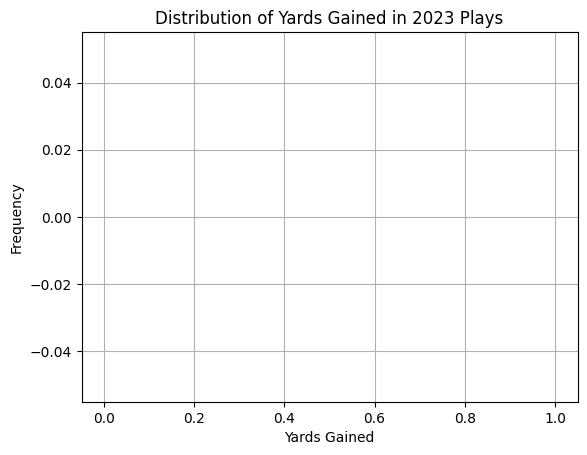

In [5]:
import matplotlib.pyplot as plt

# Plot histogram of yards gained
cleaned_pbp_data['yards_gained'].hist(bins=20)
plt.title('Distribution of Yards Gained in 2023 Plays')
plt.xlabel('Yards Gained')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Saving the cleaned data to a CSV file
cleaned_pbp_data.to_csv('cleaned_pbp_data_2023.csv', index=False)